In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("SalesData.csv")
df.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,SKU #4046,SKU #4225,SKU #4770,Total Bags,Small Bags,Large Bags,XLarge Bags,category,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,11/22/2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,11/15/2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,11/8/2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,11/1/2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,10/25/2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


# For each region, calculate the months during which the total volume crossed 1.5 billion

In [4]:
tdf = pd.read_csv("SalesDataMonth.csv")
tdf.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,SKU #4046,SKU #4225,SKU #4770,Total Bags,Small Bags,Large Bags,XLarge Bags,category,year,region,month
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Dec
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Dec
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Dec
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Dec
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Nov


In [5]:
gdf = pd.DataFrame()
for year in tdf.year.unique():
    for month in tdf.month.unique():
        for region in tdf.region.unique():
            temp = tdf.loc[tdf['year'] == year].loc[tdf['month']==month].loc[tdf['region'] == region]
            tsum = int(temp['Total Volume'].sum())
            if (tsum > 1500000):
                gdf = gdf.append({'year':year,'month':month,'region':region,'Total Volume':tsum},ignore_index=True)
gdf.head()

,Total Volume,month,region,year
0,1508067.0,Dec,Atlanta,2015.0
1,2553771.0,Dec,BaltimoreWashington,2015.0
2,2012020.0,Dec,Boston,2015.0
3,21159180.0,Dec,California,2015.0
4,2779016.0,Dec,Chicago,2015.0


In [5]:
gdf.to_csv(r'millions.csv')

In [20]:
gdf = pd.DataFrame()
for region in tdf.region.unique():
    nsum = 0
    nmonth = ""
    nyear = 0
    for year in tdf.year.unique():
        for month in tdf.month.unique():
            temp = tdf.loc[tdf['year'] == year].loc[tdf['month']==month].loc[tdf['region'] == region]
            tsum = int(temp['Total Volume'].sum())
            if tsum > nsum:
                nsum = tsum
                nmonth = month
                nyear = year
    gdf = gdf.append({'year':nyear,'month':nmonth,'region':region,'Total Volume':nsum},ignore_index=True)
gdf.head()

,Total Volume,month,region,year
0,624854.0,May,Albany,2016.0
1,3463166.0,May,Atlanta,2016.0
2,4770762.0,May,BaltimoreWashington,2016.0
3,512234.0,Jan,Boise,2017.0
4,3767928.0,May,Boston,2016.0


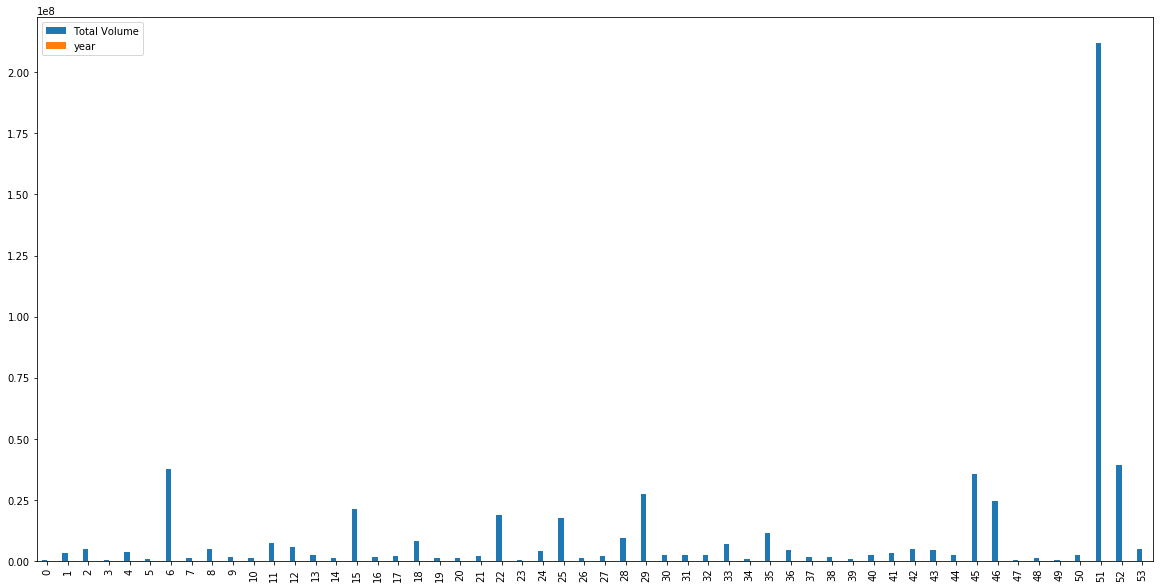

In [22]:
gdf.plot(kind='bar',figsize = (20,10))

#  For each year, calculate the SKU that sold the most (in terms of volume). 

In [119]:
gdf = pd.DataFrame(columns=['year',"4046","4225","4770"])

In [120]:
gdf.head()

,year,4046,4225,4770


In [121]:
for year in df.year.unique():
    temp = df.loc[df['year'] == year]
    first = temp['SKU #4046'].sum()/10000
    second = temp['SKU #4225'].sum()/10000
    third = temp['SKU #4770'].sum()/10000
    gdf = gdf.append({'year' : year , '4046' : first,'4225':second,'4770':third} , ignore_index=True)

In [122]:
gdf.head()

,year,4046,4225,4770
0,2015.0,170944.998134,176105.403612,14277.239455
1,2016.0,152512.289230,167272.828800,15987.984501
2,2017.0,165203.813152,154473.471953,9121.750778
3,2018.0,46049.973410,40775.867428,2293.259479


In [125]:
gdf.set_index('year').max(axis=1)

year
2015.0    176105.403612
2016.0    167272.828800
2017.0    165203.813152
2018.0     46049.973410
dtype: float64

2015 = 4225

2016 = 4225

2017 = 4046

2018 = 4046

#  For each category and each month, calculate the ratio of large bags sold in the “TotalUS” region to large bags sold in the region “Charlotte.”

In [139]:
gdf = pd.DataFrame()
for year in tdf.year.unique():
    for month in tdf.month.unique():
        for category in tdf.category.unique():
            temp = tdf.loc[tdf['year'] == year].loc[tdf['month']==month].loc[tdf['category'] == category].loc[tdf['region'] == "TotalUS"]
            temp2 = tdf.loc[tdf['year'] == year].loc[tdf['month']==month].loc[tdf['category'] == category].loc[tdf['region'] == "Charlotte"]
            
            usRatio = temp['Large Bags'].sum()/temp['Total Bags'].sum()
            cRatio = temp2['Large Bags'].sum()/temp2['Total Bags'].sum()
            gdf = gdf.append({'year' : year , 'month' : month,
                              'category':category,'TotalUS Ratio':usRatio,
                              'Charlotte Ratio':cRatio} , ignore_index=True)
        

C:\Users\jakeh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\jakeh\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [143]:
gdf.dropna()

,Charlotte Ratio,TotalUS Ratio,category,month,year
0,0.068777,0.196913,conventional,Dec,2015.0
1,0.022537,0.456247,organic,Dec,2015.0
2,0.105828,0.207669,conventional,Nov,2015.0
3,0.004356,0.464208,organic,Nov,2015.0
4,0.150243,0.215756,conventional,Oct,2015.0
5,0.000000,0.439726,organic,Oct,2015.0
6,0.124024,0.218081,conventional,Sep,2015.0
7,0.000000,0.359493,organic,Sep,2015.0
8,0.038132,0.140495,conventional,Aug,2015.0
9,0.000000,0.357206,organic,Aug,2015.0


In [144]:
gdf.to_csv(r'USvsCharlotte.csv')